# New York Air Quality Prediction

## Data Loading

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('updated_air_quality_data.csv')

# Exploratory Data Analysis

In [3]:
df.shape

(18016, 9)

In [4]:
df.size

162144

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18016 entries, 0 to 18015
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unique ID             18016 non-null  int64  
 1   Name                  18016 non-null  object 
 2   Measure               18016 non-null  object 
 3   Geo Type Name         18016 non-null  object 
 4   Geo Place Name        18016 non-null  object 
 5   Time Period           18016 non-null  object 
 6   Start_Date            18016 non-null  object 
 7   Data Value            18016 non-null  float64
 8   Air Quality Category  18016 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.2+ MB


In [6]:
df.describe()

,Unique ID,Data Value
count,18016.000000,18016.000000
mean,426187.112789,21.412678
std,250391.154793,23.976151
min,121644.000000,0.000000
25%,175300.750000,8.900000
50%,410798.500000,15.200000
75%,649886.250000,26.700000
max,828353.000000,424.700000


In [7]:
df.isnull().sum()

,0
Unique ID,0
Name,0
Measure,0
Geo Type Name,0
Geo Place Name,0
Time Period,0
Start_Date,0
Data Value,0
Air Quality Category,0


In [8]:
df.isna().sum()

,0
Unique ID,0
Name,0
Measure,0
Geo Type Name,0
Geo Place Name,0
Time Period,0
Start_Date,0
Data Value,0
Air Quality Category,0


In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique()

,0
Unique ID,18016
Name,4
Measure,4
Geo Type Name,5
Geo Place Name,6
Time Period,4
Start_Date,43
Data Value,1147
Air Quality Category,3


## Data Visualization

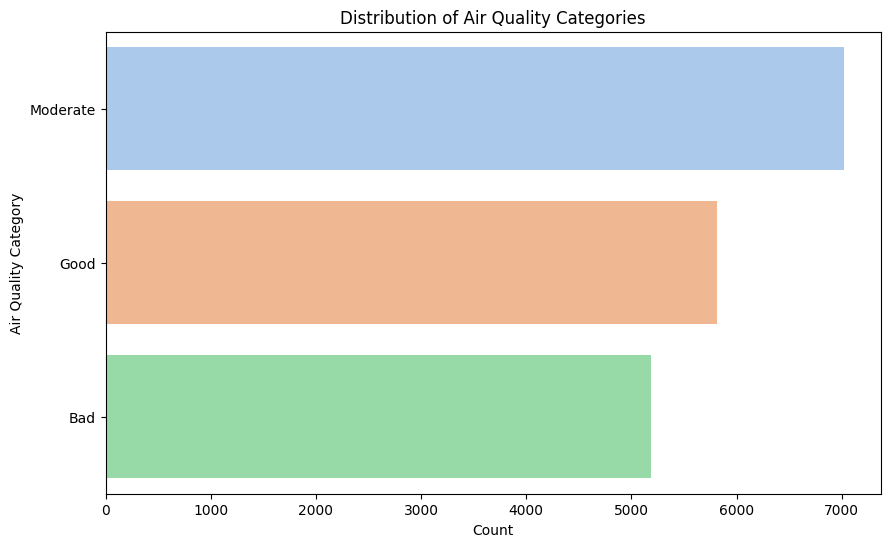

In [11]:
# Distribution of Air Quality Categories

plt.figure(figsize=(10, 6))
sns.countplot(y='Air Quality Category', data=df, order=df['Air Quality Category'].value_counts().index, palette='pastel')
plt.title('Distribution of Air Quality Categories')
plt.xlabel('Count')
plt.ylabel('Air Quality Category')
plt.show()

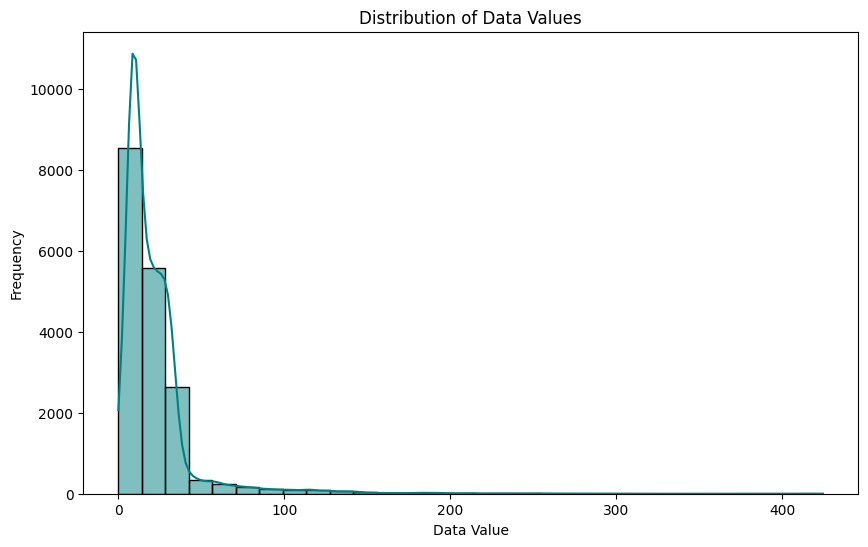

In [12]:
# Data Value Distribution

plt.figure(figsize=(10, 6))
sns.histplot(df['Data Value'], bins=30, kde=True, color='teal')
plt.title('Distribution of Data Values')
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.show()

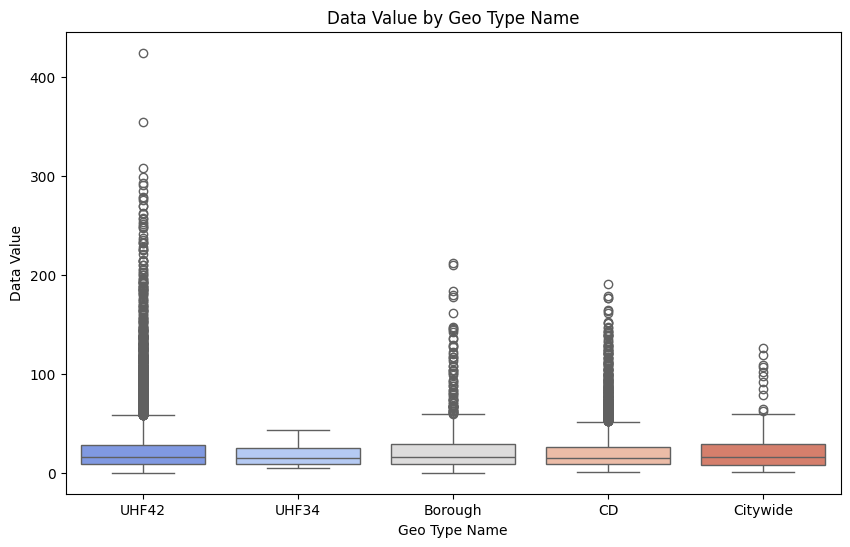

In [13]:
# Data Value by Geo Type Name

plt.figure(figsize=(10, 6))
sns.boxplot(x='Geo Type Name', y='Data Value', data=df, palette='coolwarm')
plt.title('Data Value by Geo Type Name')
plt.xlabel('Geo Type Name')
plt.ylabel('Data Value')
plt.show()

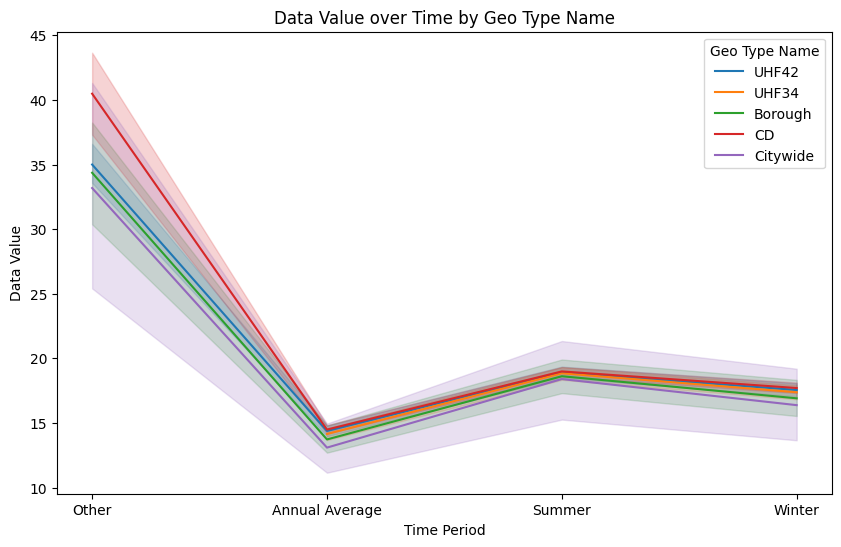

In [14]:
#  Data Value by Time Period

plt.figure(figsize=(10, 6))
sns.lineplot(x='Time Period', y='Data Value', hue='Geo Type Name', data=df, palette='tab10')
plt.title('Data Value over Time by Geo Type Name')
plt.xlabel('Time Period')
plt.ylabel('Data Value')
plt.legend(title='Geo Type Name')
plt.show()

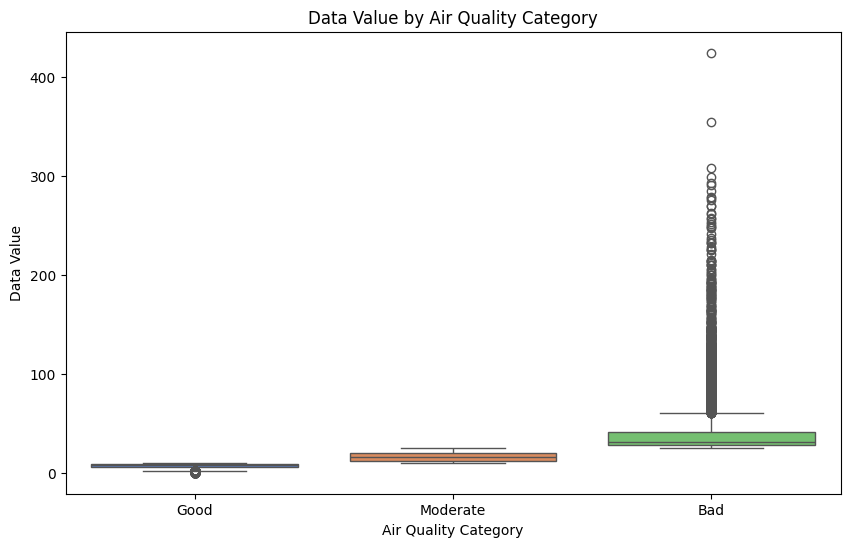

In [15]:
#  Data Value vs Air Quality Category

plt.figure(figsize=(10, 6))
sns.boxplot(x='Air Quality Category', y='Data Value', data=df, palette='muted')
plt.title('Data Value by Air Quality Category')
plt.xlabel('Air Quality Category')
plt.ylabel('Data Value')
plt.show()

## Data Cleaning and Preprocessing

In [17]:
df = df.drop(columns=['Unique ID','Start_Date'])

In [18]:
encoder = LabelEncoder()

label_mappings = {}

for col in df.select_dtypes('object'):
    df[col] = encoder.fit_transform(df[col])
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{code} -> {label}")
    print()

Column: Name
0 -> Asthma-Related
1 -> Emissions
2 -> General Pollution
3 -> Hospitalizations

Column: Measure
0 -> Concentration
1 -> Density
2 -> Miles
3 -> Rates

Column: Geo Type Name
0 -> Borough
1 -> CD
2 -> Citywide
3 -> UHF34
4 -> UHF42

Column: Geo Place Name
0 -> Bronx
1 -> Brooklyn
2 -> Manhattan
3 -> Queens
4 -> Staten Island
5 -> Unknown

Column: Time Period
0 -> Annual Average
1 -> Other
2 -> Summer
3 -> Winter

Column: Air Quality Category
0 -> Bad
1 -> Good
2 -> Moderate



In [19]:
X = df.drop('Air Quality Category',axis = 1)
y = df['Air Quality Category']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [21]:
lr = LogisticRegression(solver = 'liblinear')
lr_model = lr.fit(X, y)

## Model Evaluation

In [22]:
# Accuracy

y_pred = lr_model.predict(X)
lr_accuracy = accuracy_score(y, y_pred)
lr_accuracy

0.9795737122557726